/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_85849/2107217911.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2025-01-01', periods=12, freq='M')


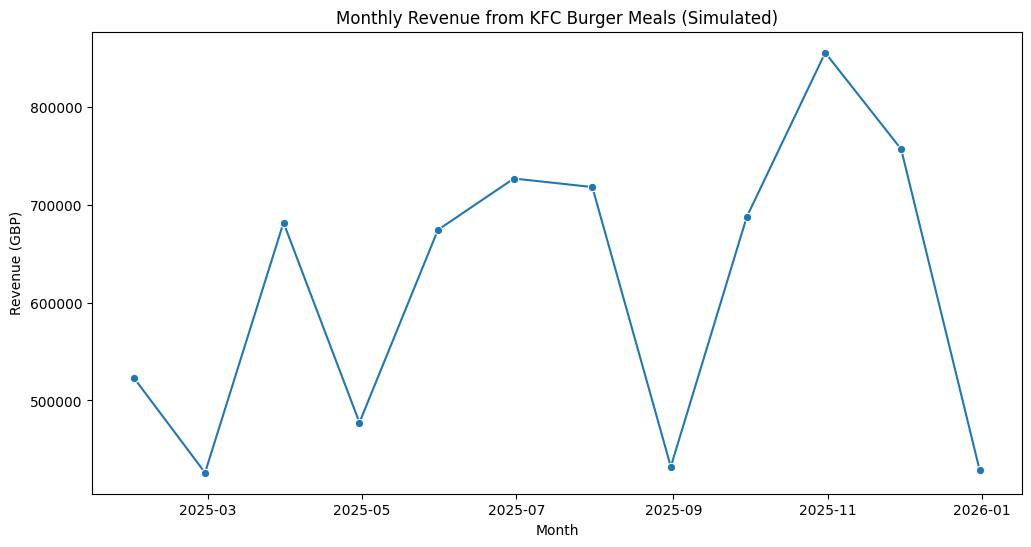

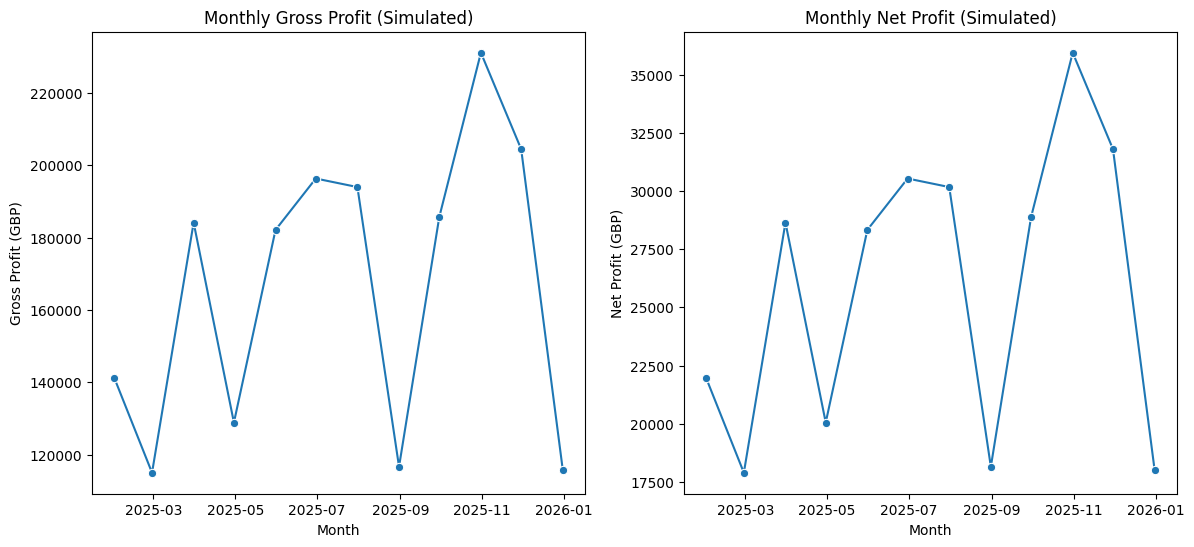

/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_85849/2107217911.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Range', y='Percent_Customers', data=demographics, palette='magma')


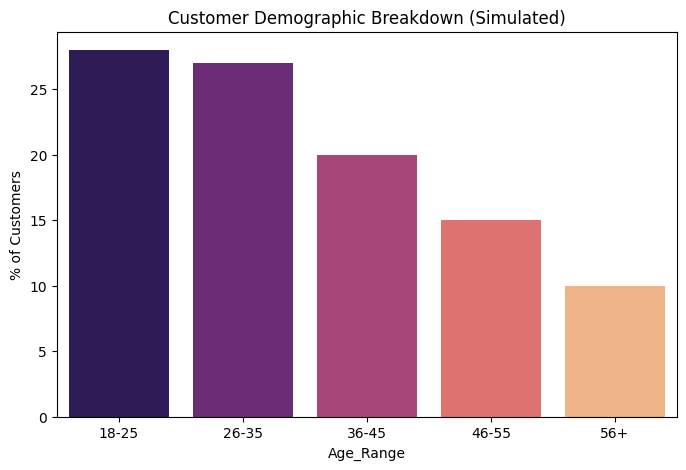

Datasets saved as CSV files.


In [1]:
# KFC_Burger_Sales_Dataset.ipynb

# Step 1 — Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Step 2 — Create Simulated Sales & Margin Data
# Note: KFC overall profit/gross margin approximated from financial reports (e.g., ~4.2% profit margin, ~27% gross margin) :contentReference[oaicite:1]{index=1}

np.random.seed(42)

months = pd.date_range(start='2025-01-01', periods=12, freq='M')

sales_data = pd.DataFrame({
    'Month': months,
    # simulate burger meal sales (units sold)
    'Burger_Meals_Sold': np.random.randint(50_000, 120_000, size=12),
    # simulate average sale price per meal
    'Avg_Price_GBP': np.random.uniform(6.50, 8.50, size=12)
})

# calculate sales revenue
sales_data['Revenue_GBP'] = sales_data['Burger_Meals_Sold'] * sales_data['Avg_Price_GBP']

# simulate profit margins:
# approximate KFC net profit margin ~4.2% (TTM) and gross margin ~27% :contentReference[oaicite:2]{index=2}
sales_data['Gross_Profit_GBP'] = sales_data['Revenue_GBP'] * 0.27
sales_data['Net_Profit_GBP'] = sales_data['Revenue_GBP'] * 0.042

sales_data.head()

# Step 3 — Create Simulated Demographic Data
demographics = pd.DataFrame({
    'Age_Range': ['18-25', '26-35', '36-45', '46-55', '56+'],
    # approximate % of total customers in each group
    'Percent_Customers': [28, 27, 20, 15, 10]
})

# Also simulate loyalty scores (Net Promoter Score, etc.)
# approximate from general KFC customer metrics (e.g., youth scoring higher in satisfaction) :contentReference[oaicite:3]{index=3}
demographics['NPS_Score'] = [53, 40, 46, 30, 20]

demographics

# Step 4 — Plot Revenue Trends
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Revenue_GBP', data=sales_data, marker='o')
plt.title('Monthly Revenue from KFC Burger Meals (Simulated)')
plt.ylabel('Revenue (GBP)')
plt.xlabel('Month')
plt.show()

# Step 5 — Plot Profit Trend
fig, ax = plt.subplots(1,2, figsize=(14,6))

sns.lineplot(x='Month', y='Gross_Profit_GBP', data=sales_data, marker='o', ax=ax[0])
ax[0].set_title('Monthly Gross Profit (Simulated)')
ax[0].set_ylabel('Gross Profit (GBP)')

sns.lineplot(x='Month', y='Net_Profit_GBP', data=sales_data, marker='o', ax=ax[1])
ax[1].set_title('Monthly Net Profit (Simulated)')
ax[1].set_ylabel('Net Profit (GBP)')

plt.show()

# Step 6 — Plot Customer Demographics
plt.figure(figsize=(8,5))
sns.barplot(x='Age_Range', y='Percent_Customers', data=demographics, palette='magma')
plt.title('Customer Demographic Breakdown (Simulated)')
plt.ylabel('% of Customers')
plt.show()

# Step 7 — Save Dataset (Optional)
sales_data.to_csv('kfc_burger_sales_dataset.csv', index=False)
demographics.to_csv('kfc_burger_demographics.csv', index=False)

print("Datasets saved as CSV files.")